<a href="https://colab.research.google.com/github/vishvpatel17/Task-7-Email-Spam-Detection-using-Naive-Bayes/blob/main/Email_spam_detection_using_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load a standard labeled dataset (Ham/Spam)

df = pd.read_csv("/content/spam.csv", encoding='latin1')

In [ ]:
# Preview the data
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Convert labels to numerical values: ham = 0, spam = 1

df['label_num'] = df.v1.map({'ham': 0, 'spam': 1})

X = df['v2']
y = df['label_num']

In [ ]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
# Fit and transform the training data, then transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Make predictions
y_pred = nb_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 96.68%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [ ]:
def predict_email(text):
    text_tfidf = tfidf.transform([text])
    prediction = nb_model.predict(text_tfidf)
    return "SPAM" if prediction[0] == 1 else "HAM (Safe)"

# Test cases
samples = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
    "Hey, are we still meeting for coffee at 4 PM today?",
    "URGENT: Your account has been compromised. Please reset your password immediately.",
    "Congratulation! you win $1000 lottery"
]

for s in samples:
    print(f"Message: {s}\nResult: {predict_email(s)}\n")

Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.
Result: SPAM

Message: Hey, are we still meeting for coffee at 4 PM today?
Result: HAM (Safe)

Message: URGENT: Your account has been compromised. Please reset your password immediately.
Result: HAM (Safe)

Message: Congratulation! you win $1000 lottery
Result: SPAM



/tmp/ipython-input-1181/3720463861.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1', data=df, palette='viridis')


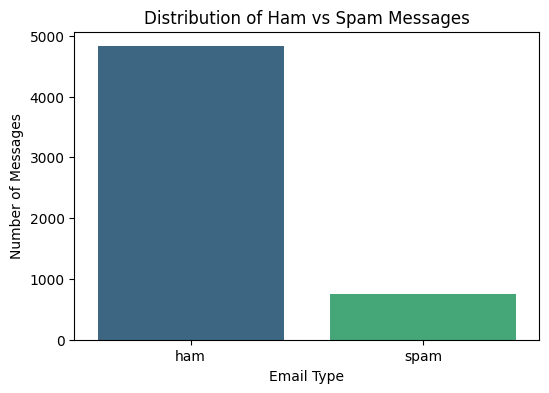

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each label
plt.figure(figsize=(6, 4))
sns.countplot(x='v1', data=df, palette='viridis')
plt.title('Distribution of Ham vs Spam Messages')
plt.xlabel('Email Type')
plt.ylabel('Number of Messages')
plt.show()

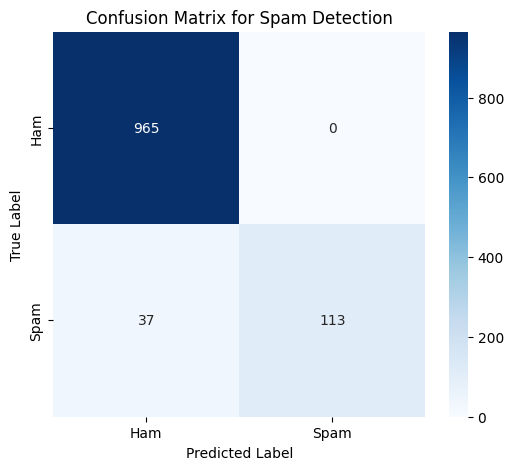

In [ ]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize with a Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Spam Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

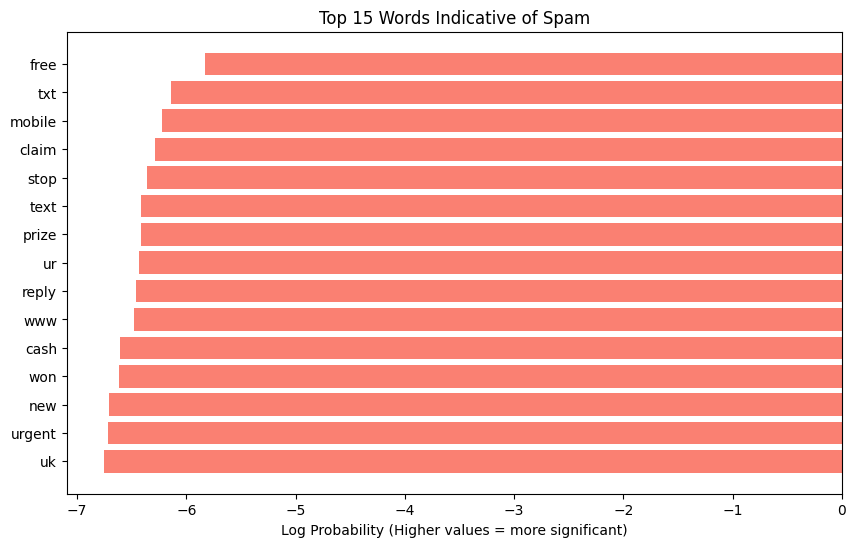

In [ ]:
import numpy as np

# Get feature names from TF-IDF
feature_names = np.array(tfidf.get_feature_names_out())

# Get the words with the highest probability for the "Spam" class (index 1)
spam_prob_indices = nb_model.feature_log_prob_[1].argsort()[-15:]
top_spam_words = feature_names[spam_prob_indices]
top_spam_scores = nb_model.feature_log_prob_[1][spam_prob_indices]

# Plot the top words
plt.figure(figsize=(10, 6))
plt.barh(top_spam_words, top_spam_scores, color='salmon')
plt.title('Top 15 Words Indicative of Spam')
plt.xlabel('Log Probability (Higher values = more significant)')
plt.show()